In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy

In [2]:
data_arr = np.loadtxt("../data/Close.csv", delimiter=',', dtype=str)
data_arr

array([['', '2010-01-04', '2010-01-05', ..., '2014-12-29', '2014-12-30',
        '2014-12-31'],
       ['iba.us', '20.225', '20.858', ..., '47.72', '47.682', '47.295'],
       ['wpz.us', '22.355', '22.589', ..., '41.219', '40.509', '40.116'],
       ...,
       ['atu.us', '18.69', '18.78', ..., '27.525', '27.465', '27.088'],
       ['co.us', '303.66', '301.2', ..., '34.65', '31.5', '32.55'],
       ['apf.us', '12.231', '12.305', ..., '14.463', '14.493', '14.532']],
      dtype='<U11')

In [3]:
data_arr = np.delete(np.delete(data_arr, 0, 0), 0, 1).astype(np.float64)
data_arr

array([[ 20.225 ,  20.858 ,  20.612 , ...,  47.72  ,  47.682 ,  47.295 ],
       [ 22.355 ,  22.589 ,  22.637 , ...,  41.219 ,  40.509 ,  40.116 ],
       [  9.3094,   9.1551,   9.0008, ...,  17.816 ,  17.388 ,  17.529 ],
       ...,
       [ 18.69  ,  18.78  ,  18.89  , ...,  27.525 ,  27.465 ,  27.088 ],
       [303.66  , 301.2   , 302.01  , ...,  34.65  ,  31.5   ,  32.55  ],
       [ 12.231 ,  12.305 ,  12.395 , ...,  14.463 ,  14.493 ,  14.532 ]])

### Task 0

In [4]:
# numpy version
def get_returns(data):
    temp = np.lib.stride_tricks.sliding_window_view(data, (1,2))
    lambda_returns = lambda x: x[..., 1] / x[..., 0]
    returns = lambda_returns(temp).reshape(data.shape[0], data.shape[1] - 1)
    return returns

In [5]:
def correct_wrong_values(data, scale):
    err_coord_low = np.where(get_returns(data) <= (1 / scale))
    err_coord_high = np.where(get_returns(data) >= scale)
    for i in range(len(err_coord_low[0])):
        id_low_0 = err_coord_low[0][i]
        id_low_1 = err_coord_low[1][i]
        
        id_high_0 = err_coord_high[0][i]
        id_high_1 = err_coord_high[1][i]

        if 0.5 < data[id_high_0][id_low_1] / data[id_high_0][id_high_1 + 1] < 2:        # if the price has dropped
            data[id_high_0][id_high_1] = data[id_high_0][id_high_1 + 1]

        if 0.5 < data[id_high_0][id_high_1] / data[id_high_0][id_low_1 + 1] < 2:        # If the price went up
            data[id_high_0][id_low_1] = data[id_high_0][id_low_1 + 1]

##### test 

In [6]:
data_returns = get_returns(data_arr)
data_returns

array([[1.0312979 , 0.98820596, 1.0034446 , ..., 0.99561861, 0.99920369,
        0.99188373],
       [1.01046746, 1.00212493, 0.98374343, ..., 0.99934539, 0.98277493,
        0.99029845],
       [0.98342536, 0.98314601, 1.00218869, ..., 1.00462389, 0.97597665,
        1.00810904],
       ...,
       [1.00481541, 1.00585729, 1.01508735, ..., 1.00728244, 0.99782016,
        0.98627344],
       [0.99189883, 1.00268924, 0.96923943, ..., 0.97058824, 0.90909091,
        1.03333333],
       [1.0060502 , 1.0073141 , 0.99596612, ..., 0.99724195, 1.00207426,
        1.00269095]])

In [7]:
scale = 9
print(np.where(get_returns(data_arr) >= scale)[0])
print(np.where(get_returns(data_arr) >= scale)[1])
print('correct wrong values')
correct_wrong_values(data_arr, scale)
print(np.where(get_returns(data_arr) >= scale)[0])
print(np.where(get_returns(data_arr) >= scale)[1])

[ 178  185  565  569  592  592  772 1315 1528 1657 1805 2144 2313]
[ 901  679 1046  255  177  747  273  566  154  305  855  982  903]
correct wrong values
[569 772]
[254 272]


### Task 1

In [8]:
def neutralize(alpha):
    return alpha - np.mean(alpha)

##### test

In [9]:
alpha = np.array([-11, 3.1, 2, 10, 4, 5, 6, 7, 10])
print(alpha)
print('neutralize')
print(sum(neutralize(alpha)))

[-11.    3.1   2.   10.    4.    5.    6.    7.   10. ]
neutralize
0.0


### Task 2

In [10]:
def normalize(alpha):
    return alpha / np.sum(np.abs(alpha))

test

In [11]:
alpha = np.array([-11, 3.1, 2, 10, 4, 5, 6, 7, 10])
print(alpha)
print('normalize')
print(sum(normalize(np.abs(alpha))))

[-11.    3.1   2.   10.    4.    5.    6.    7.   10. ]
normalize
1.0


### Task 3

In [12]:
def truncate(alpha, max_weight, coef):
    signs = (alpha / np.abs(alpha))
    alpha[np.abs(alpha) > max_weight * coef] = max_weight * coef
    alpha = alpha * signs
    return alpha

In [13]:
alpha = np.array([-11, 3.1, 2, 10, 4, 5, 6, 7, 10])
coef = 0.9
max_weight = 9
print(alpha)
print('truncate')
print(truncate(alpha, max_weight, coef))

[-11.    3.1   2.   10.    4.    5.    6.    7.   10. ]
truncate
[-8.1  3.1  2.   8.1  4.   5.   6.   7.   8.1]


### Task 4

In [14]:
def get_returns(data):
    temp = np.lib.stride_tricks.sliding_window_view(data, (1,2))
    lambda_returns = lambda x: x[..., 1] / x[..., 0]
    returns = lambda_returns(temp).reshape(data_arr.shape[0], data_arr.shape[1] - 1)
    return returns

In [15]:
print(data_arr)
print('get_returns')
print(get_returns(data_arr))
np.save('../data/returns', get_returns(data_arr))

[[ 20.225   20.858   20.612  ...  47.72    47.682   47.295 ]
 [ 22.355   22.589   22.637  ...  41.219   40.509   40.116 ]
 [  9.3094   9.1551   9.0008 ...  17.816   17.388   17.529 ]
 ...
 [ 18.69    18.78    18.89   ...  27.525   27.465   27.088 ]
 [303.66   301.2    302.01   ...  34.65    31.5     32.55  ]
 [ 12.231   12.305   12.395  ...  14.463   14.493   14.532 ]]
get_returns
[[1.0312979  0.98820596 1.0034446  ... 0.99561861 0.99920369 0.99188373]
 [1.01046746 1.00212493 0.98374343 ... 0.99934539 0.98277493 0.99029845]
 [0.98342536 0.98314601 1.00218869 ... 1.00462389 0.97597665 1.00810904]
 ...
 [1.00481541 1.00585729 1.01508735 ... 1.00728244 0.99782016 0.98627344]
 [0.99189883 1.00268924 0.96923943 ... 0.97058824 0.90909091 1.03333333]
 [1.0060502  1.0073141  0.99596612 ... 0.99724195 1.00207426 1.00269095]]


### Task 5

In [16]:
def ranking(alpha):
    alpha = scipy.stats.rankdata(alpha, method='ordinal') / (len(alpha) - 1)
    return alpha

In [17]:
alpha = np.array([-11, 3.1, 2, 10, 4, 5, 6, 7, 10])
print(alpha)
print('ranking')
print(ranking(alpha))

[-11.    3.1   2.   10.    4.    5.    6.    7.   10. ]
ranking
[0.125 0.375 0.25  1.    0.5   0.625 0.75  0.875 1.125]


### Task 6

In [18]:
def cut_outliers(alpha, coef):
    alpha[alpha < np.quantile(alpha, coef)] = 0
    alpha[alpha > np.quantile(alpha, 1 - coef)] = 0
    return alpha

##### test


In [19]:
alpha = np.array([-11, 3.1, 2, 10, 4, 5, 6, 7, 10, 12])
coef = 0.01
print(alpha)
print('cut_outliers')
print(cut_outliers(alpha, coef))

[-11.    3.1   2.   10.    4.    5.    6.    7.   10.   12. ]
cut_outliers
[ 0.   3.1  2.  10.   4.   5.   6.   7.  10.   0. ]


### Task 7


In [20]:
def cut_middle(alpha, eps):
    alpha[(alpha <= np.mean(alpha) + eps) & (alpha >= np.mean(alpha) - eps)] = 0
    return alpha

In [21]:
alpha = np.array([-11, 3.1, 2, 10, 4, 5, 6, 7, 10, 12])
print(alpha)
eps = 1
print('cut_middle')
cut_middle(alpha, eps)
print(alpha)

[-11.    3.1   2.   10.    4.    5.    6.    7.   10.   12. ]
cut_middle
[-11.    3.1   2.   10.    0.    0.    6.    7.   10.   12. ]


### Task 8

In [22]:
def apply_function(alpha, func):
    new_func = np.vectorize(func)
    return new_func(alpha)

test

In [23]:
def test_func_1(value):
    return np.log(np.sqrt(np.abs(value)) + 1) / np.pi

In [24]:
def test_func_2(value):
    if np.abs(value) > 0.1:
        return value * 0.9
    return value

In [25]:
alpha = np.array([-11, 3.1, 2, 10, 4, 5, 6, 7, 10, 12])
sign = alpha / abs(alpha)
print(alpha)
alpha = apply_function(alpha, test_func_1)
print(sign * (np.exp((alpha * np.pi)) - 1) ** 2)

[-11.    3.1   2.   10.    4.    5.    6.    7.   10.   12. ]
[-11.    3.1   2.   10.    4.    5.    6.    7.   10.   12. ]


In [26]:
alpha = np.array([-11, 3.1, 2, 10, 4, 5, 6, 7, 10, 12])
alpha = normalize(alpha)
print(alpha)
print('apply_function')
print(alpha - apply_function(alpha, test_func_2))

[-0.15691869  0.04422254  0.02853067  0.14265335  0.05706134  0.07132668
  0.08559201  0.09985735  0.14265335  0.17118402]
apply_function
[-0.01569187  0.          0.          0.01426534  0.          0.
  0.          0.          0.01426534  0.0171184 ]


### Task 9

In [27]:
data_pd = pd.read_csv('../data/Close.csv').T.drop(labels='Unnamed: 0', axis=0)
data_pd.index = data_pd.index.astype('datetime64')
data_pd

,0,1,2,3,4,5,6,7,8,9,...,2426,2427,2428,2429,2430,2431,2432,2433,2434,2435
2010-01-04,20.225,22.355,9.3094,10.2,3.4959,9.955,26.66,11.898,9.4832,16.594,...,2.9896,21.9,19.27,12.832,17.76,7.7942,33.864,18.69,303.66,12.231
2010-01-05,20.858,22.589,9.1551,10.25,3.4577,10.022,26.57,11.954,9.511,16.765,...,3.0673,20.91,19.466,13.234,17.88,7.84,34.744,18.78,301.2,12.305
2010-01-06,20.612,22.637,9.0008,10.05,3.3339,10.217,26.92,11.594,9.515,16.779,...,3.039,20.8,19.57,13.442,16.68,7.8477,35.07,18.89,302.01,12.395
2010-01-07,20.683,22.269,9.0205,10.4,3.5341,10.115,26.5,11.695,9.772,16.454,...,3.2582,21.65,19.613,13.12,17.52,7.8707,34.599,19.175,292.72,12.345
2010-01-08,21.085,22.192,8.9584,11.35,3.4197,10.149,26.19,11.485,9.806,16.779,...,3.2016,21.25,19.57,13.106,17.52,7.8785,34.813,19.474,296.55,12.435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-24,48.145,41.828,17.05,17.78,13.213,7.55,36.5,16.755,13.754,11.827,...,5.6688,63.86,50.39,15.642,11.88,15.249,46.497,27.058,35.7,14.444
2014-12-26,47.93,41.246,17.734,18.01,13.383,7.49,36.65,16.391,13.805,12.041,...,5.6144,65.37,50.634,15.908,11.1,15.34,45.27,27.326,35.7,14.503
2014-12-29,47.72,41.219,17.816,18.65,13.261,7.72,35.46,16.541,13.898,12.041,...,5.6235,64.1,52.36,15.678,10.8,15.443,45.854,27.525,34.65,14.463
2014-12-30,47.682,40.509,17.388,18.56,13.173,7.43,34.83,16.521,13.83,11.888,...,5.6325,63.36,50.88,15.925,10.92,15.434,45.374,27.465,31.5,14.493


In [28]:
def alpha_reversion(data):
    alpha = -data.rolling(2).apply(lambda x: x.iloc[1] / x.iloc[0] - 1)
    alpha = alpha.T.apply(neutralize).apply(normalize).T
    return alpha

In [42]:
data_little = data_pd[240:260][[x for x in range(3)]]
data_little.to_csv('../data/data_little.csv')

In [43]:
alpha_revers_little = alpha_reversion(data_little)
alpha_revers_little

,0,1,2
2010-12-15,NaN,NaN,NaN
2010-12-16,-0.500000,0.189123,0.310877
2010-12-17,0.283653,-0.500000,0.216347
2010-12-20,0.494299,0.005701,-0.500000
2010-12-21,-0.176414,0.500000,-0.323586
2010-12-22,0.276795,0.223205,-0.500000
2010-12-23,0.437558,-0.500000,0.062442
2010-12-27,0.500000,-0.122068,-0.377932
2010-12-28,0.184245,-0.500000,0.315755
2010-12-29,-0.500000,0.171307,0.328693


In [44]:
print(sum(alpha_revers_little.iloc[5]))
print(sum(abs(alpha_revers_little.iloc[5])))

-5.551115123125783e-17
1.0


In [45]:
def turnover(alphas, option=0):
    turnover_days = abs(alphas.diff(periods=1)).sum(axis=1)
    if option == 1:
        return turnover_days
    return turnover_days.groupby(alphas.index.year).mean()


test

In [46]:
print('turnover')
print('mean_year:',turnover(alpha_revers_little))
print('days:',turnover(alpha_revers_little, option=1))

turnover
mean_year: 2010    1.080252
2011    1.083006
dtype: float64
days: 2010-12-15    0.000000
2010-12-16    0.000000
2010-12-17    1.567305
2010-12-20    1.432695
2010-12-21    1.341427
2010-12-22    0.906418
2010-12-23    1.446410
2010-12-27    0.880749
2010-12-28    1.387373
2010-12-29    1.368491
2010-12-30    1.342614
2010-12-31    1.289542
2011-01-03    2.000000
2011-01-04    2.000000
2011-01-05    0.809467
2011-01-06    0.742893
2011-01-07    0.270725
2011-01-10    0.753811
2011-01-11    2.000000
2011-01-12    0.087154
dtype: float64


### Task 11

In [47]:
def get_returns(data):
    return data.rolling(2).apply(lambda x: x.iloc[1] / x.iloc[0]).iloc[1:, :]

In [48]:
returns = get_returns(data_little)
print(returns.shape)
returns.head()

(19, 3)


,0,1,2
2010-12-16,1.032448,0.995351,0.988797
2010-12-17,0.996120,1.020820,0.998242
2010-12-20,0.974269,0.991866,1.010078
2010-12-21,1.006737,0.998523,1.008525
2010-12-22,0.988222,0.989703,1.009701


In [49]:
print(alpha_revers_little.shape)
alpha_revers_little.head()

(20, 3)


,0,1,2
2010-12-15,NaN,NaN,NaN
2010-12-16,-0.500000,0.189123,0.310877
2010-12-17,0.283653,-0.500000,0.216347
2010-12-20,0.494299,0.005701,-0.500000
2010-12-21,-0.176414,0.500000,-0.323586


In [50]:
def get_pnl_days(data, option=0):
    alpha = alpha_reversion(data)
    returns = get_returns(data)
    pnl = alpha.reset_index().drop(columns='index').mul(returns.reset_index().drop(columns='index'), axis=0).sum(axis=1)
    if option == 1:
        ans = pd.DataFrame()
        ans['pnl'] = pnl
        ans = ans.set_index(alpha.index)
        return ans
    return pnl

In [51]:
def get_pnl_cum(dataframe):
    p_and_l = []
    for i in range(len(dataframe)):
        p_and_l.append(dataframe.head(i).sum())
    return np.array(p_and_l)[-1]

In [52]:
def get_pnl(data, option=0):
    if option == 1:
        return get_pnl_days(data, 1).groupby(get_pnl_days(data, 1).index.year).apply(get_pnl_cum)
    return get_pnl_days(data)

test pnl for real data

In [55]:
print('years pnl cum:', '\n', get_pnl(data_little, 1))
print()
print('days pnl:', '\n', get_pnl(data_little))

years pnl cum: 
 2010    [-0.023129203083331315]
2011    [-0.012681140687721734]
dtype: object

days pnl: 
 0     0.000000
1     0.005331
2    -0.001051
3    -0.000940
4    -0.006210
5     0.000198
6    -0.021428
7    -0.000631
8     0.001900
9     0.000223
10   -0.000521
11    0.002678
12    0.014094
13   -0.002448
14   -0.003992
15   -0.007625
16   -0.015614
17    0.008897
18   -0.005993
19    0.000000
dtype: float64


### Task 15

In [63]:
def corr_btw_alphas(alpha_1, alpha_2):
    return scipy.stats.pearsonr(alpha_1, alpha_2)

In [64]:
alpha_1 = np.random.rand(10)
alpha_2 = np.random.rand(10)
print(corr_btw_alphas(alpha_1, alpha_2))
alpha_3 = [1, 2, 3, 4, 5]
alpha_4 = [2, 3, 4, 5, 7]
print(corr_btw_alphas(alpha_3, alpha_4))


PearsonRResult(statistic=0.005528588903225884, pvalue=0.9879065814176226)
PearsonRResult(statistic=0.9863939238321437, pvalue=0.0019012746601963688)


### anything

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


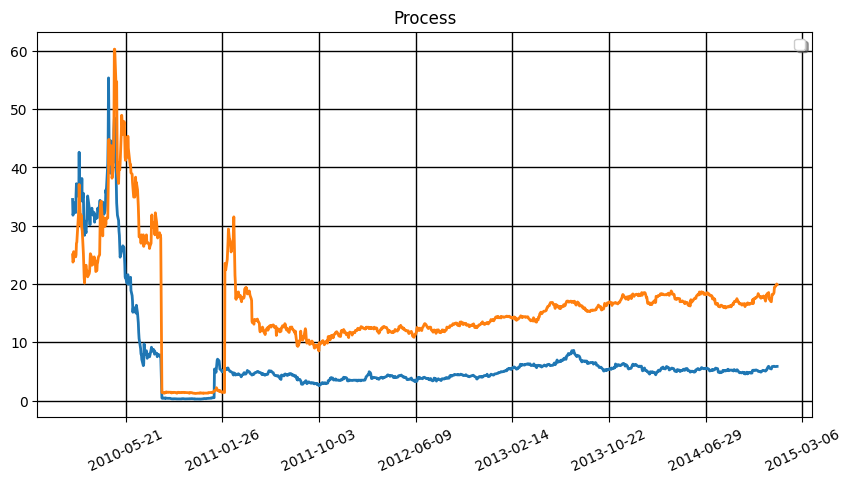

In [41]:
plt.rcParams['font.size'] = '10'
fig, ax = plt.subplots()
ax.plot()
ax.plot(data_pd.index, data_arr[569], linewidth=2, label='')
ax.plot(data_pd.index, data_arr[772], linewidth=2, label='')

ax.grid(color = 'black', linewidth = 1, linestyle = '-')    
plt.legend(loc = 'best', fancybox = True, shadow = True)


plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(250))  # интервал написания значений оси OX
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(10))  # интервал написания значений оси OY

plt.xticks(rotation=25)

fig.set_figwidth(10)
fig.set_figheight(5)

plt.title(f'Process')
plt.show()